# **Project 2**, APS1070 Fall 2024
**Anomaly Detection Algorithm using Gaussian Mixture Model**

**Deadline: Oct 25th, 11 PM - 13 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself without proper acknowledgment of the source, including generated code (please refer to the course syllabus). Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: XLC

Student ID: 

##**Marking Scheme:**

This project is worth **13 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings.

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Check that the completed `.ipynb` file runs correctly when using `Runtime -> Run All`.

2. Download your notebook: `File -> Download .ipynb`

3. Click on the Files icon on the far left menu of Colab

4. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


5. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

6. An HTML version of your notebook will appear in the files, so you can download it.

7. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858



# Project 2 [13 Marks]

##**Part 1: Getting started [1.5 Marks]**

We are going to work with the [Thyroid Disease](https://odds.cs.stonybrook.edu/thyroid-disease-dataset/) dataset. This dataset contains 6 clinical attributes to determine whether a patient referred to the clinic is hypothyroid.

 The dataset is called `Thyroid_Disease.csv`. Load the dataset in CSV file using Pandas and name it `df`. Print out the first few columns of the dataset.


* How many rows are there? 3772 **[0.1]**
* Which column contains the targets? 'hypothyroid' **[0.1]**
* To what do the target values correspond? 0/1. 1 if the clinic is hypothyroid, 0 if the clinic is not hypothyroid**[0.2]**

In [305]:
#pip install wget

In [306]:
import wget

wget.download('https://raw.githubusercontent.com/Sabaae/Dataset/main/Thyroid_Disease.csv')

'Thyroid_Disease (8).csv'

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [308]:
# Create DF
df = pd.read_csv('Thyroid_Disease.csv', index_col = 0)
# df.to_csv('data.csv', index=False)

# Read DF
df.head(10)

,Attribute0,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,hypothyroid
0,0.774194,0.001132,0.137571,0.275701,0.295775,0.236066,0.0
1,0.247312,0.000472,0.279886,0.329439,0.535211,0.173770,0.0
2,0.494624,0.003585,0.222960,0.233645,0.525822,0.124590,0.0
3,0.677419,0.001698,0.156546,0.175234,0.333333,0.136066,0.0
4,0.236559,0.000472,0.241935,0.320093,0.333333,0.247541,0.0
5,0.731183,0.000472,0.147059,0.196262,0.239437,0.198361,0.0
6,0.903226,0.000472,0.213472,0.294393,0.399061,0.195082,0.0
7,0.505376,0.003925,0.185009,0.196262,0.276995,0.177049,0.0
8,0.709677,0.002453,0.222960,0.198598,0.422535,0.127869,0.0
9,0.806452,0.000189,0.270398,0.285047,0.511737,0.155738,0.0


In [309]:
# How many rows and columns
df.shape

(3772, 7)

It's important to know how many examples we have for each class when we work with a new dataset.

* What is the percentage of entries in the dataset for each class? **[0.1]** <p>
Percentage of Hypothyroid clinic: 2.47%
Percentage of not Hypothyroid clinic: 97.53%
* Is this data considered balanced or unbalanced? Why is this the case?**[0.1]**<p>
It's consider as unbalanced dataset. A balance dataset typically has almost equal representation of all classes. Which is not the case in this dataset.
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1?  **[0.2]** <p>
Balance dataset is important, because it influences a model's ability to learn and generalize effectively across all classes. In unbalance dataset, KNN can end up leaning heavily toward the majority class. This means the model might not recognize the less common class as well, leading to more mistakes when trying to identify it. The imbalance can also mess with how distances are calculated, making it more likely that a new data point’s nearest neighbors are from the majority class. This reduces the accuracy for the underrepresented class and can cause important patterns in that minority group to be missed, ultimately weakening the overall performance and reliability of the model.

In [310]:
# Count the number of class(0/1)
class_counts = df['hypothyroid'].value_counts()

# Calculate percentage for each class
percentage = (class_counts / 3772) * 100
print(percentage)

hypothyroid
0.0    97.534464
1.0     2.465536
Name: count, dtype: float64


Next, split the dataset into a training (70%), validation (15%) and testing set (15%). Set the random state to 0. **[0.2]**

Make sure to separate out the column corresponding to the targets.

In [311]:
# Set X and y
X = df.drop(columns=['hypothyroid'])
y = df['hypothyroid']

# First split: Train (70%) and Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)

# Second split: Validation (15%) and Test (15%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Check the splits
print(f"Train: {X_train.shape[0]} samples")
print(f"Validation: {X_val.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

Train: 2640 samples
Validation: 566 samples
Test: 566 samples


Now, let's take a look at the difference in distribution for some variables between hypothyroid and not-hypothyroid patients:

Attribute0
Attribute1
Attribute2
Attribute3
Attribute4
Attribute5


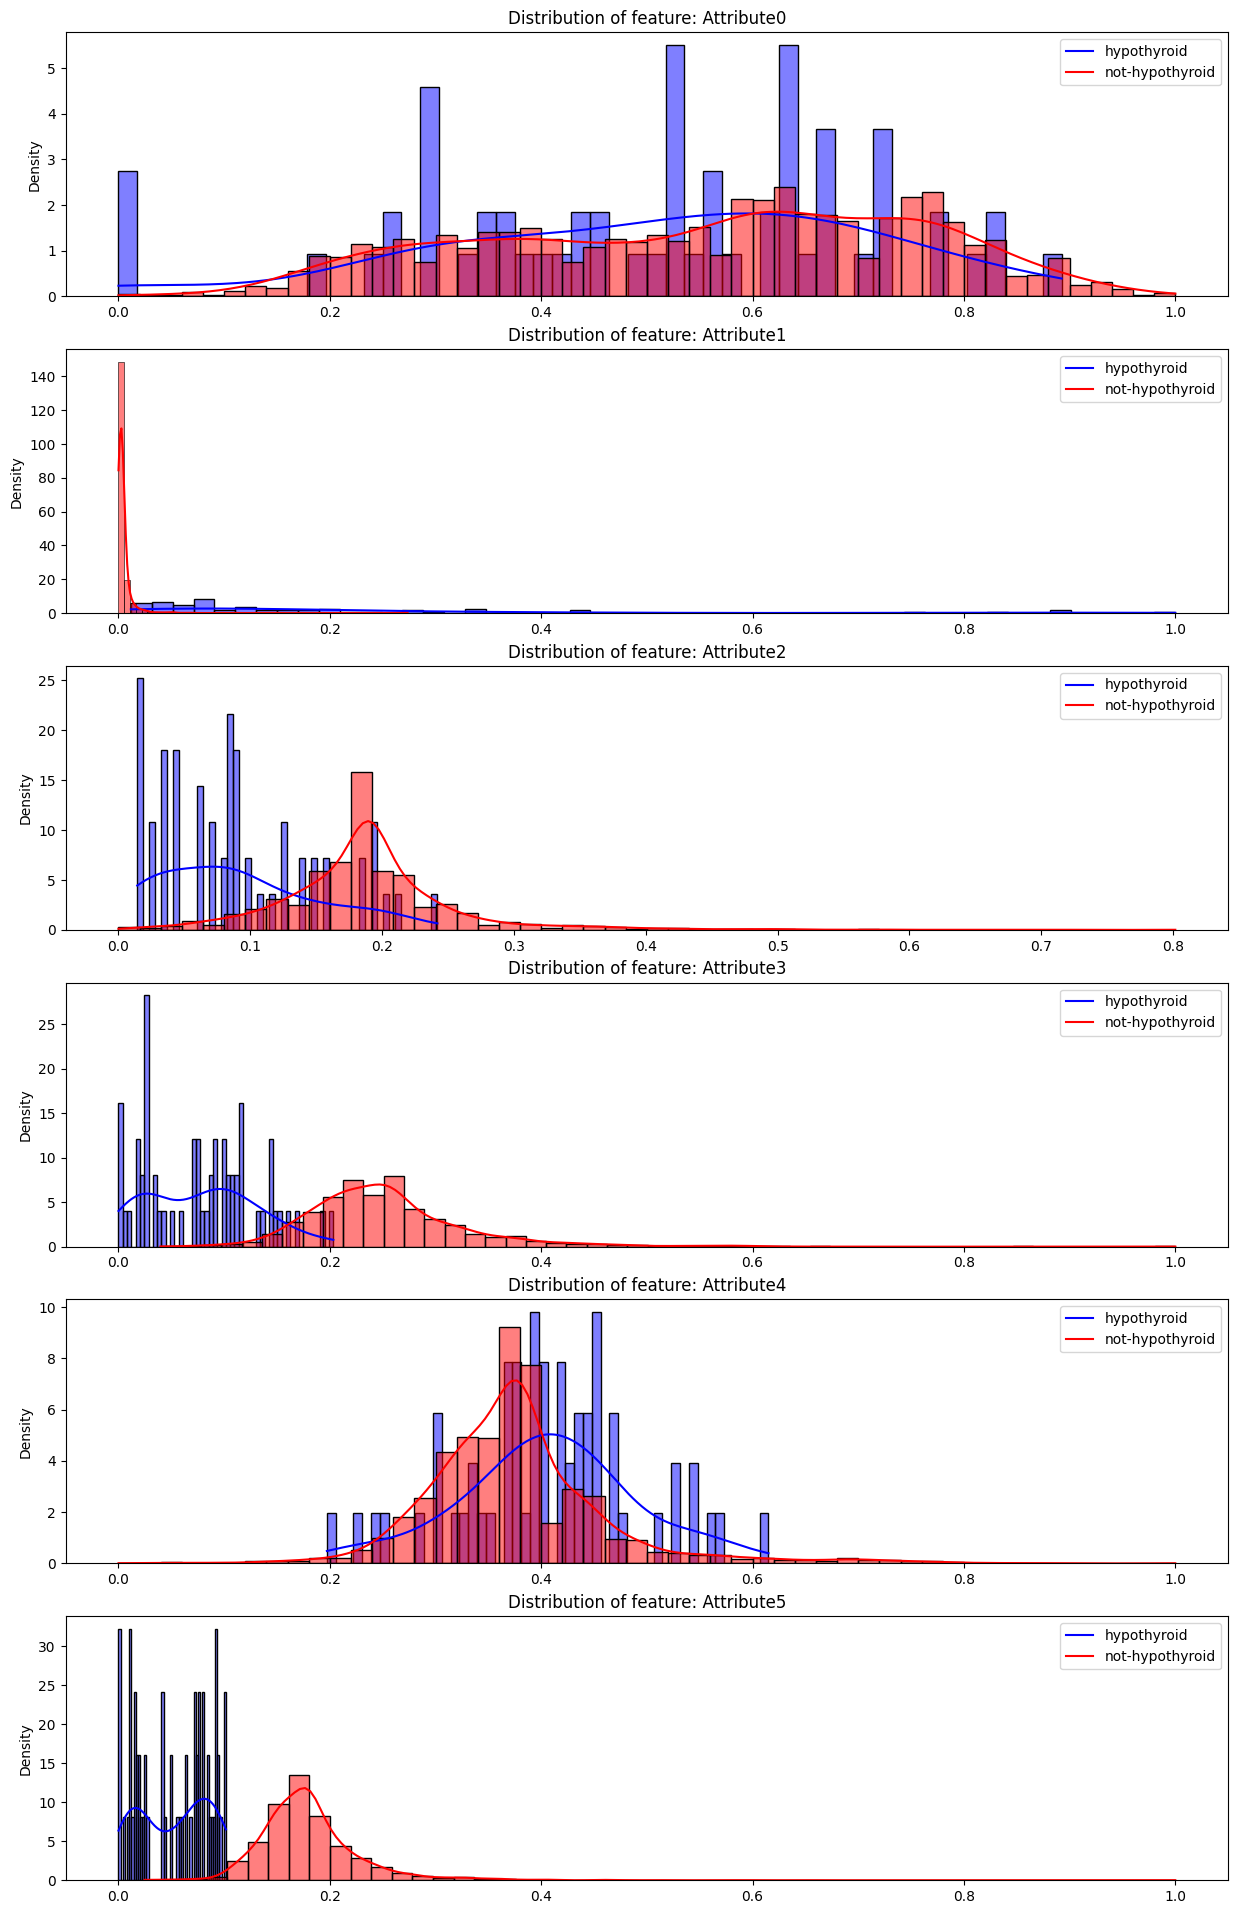

In [312]:
import matplotlib.gridspec as gridspec
features=list(df.columns[:-1])
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    print(feat)
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['hypothyroid', 'not-hypothyroid'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[0.5]**<p>
Each plot show the feature distribution for the hypothyroid - blue and not hypothyroid - red classes. The Gaussian distribution allows us to visually verify whether the features follow a normal distibution or not, and how well-separated the distribution of the classes are. In the context of anomaly detection, the goal is to identify instances that deviate from the norm. In this case, the non-hypothyroid represent the normal group, and the hypotyhyroid can be treated as anomalies. For features like Attribute1,3,5 are ideal for Gaussian-based anomaly detection because they make it easier to identify hypothyroid instances. And features like Attribute0 and 4 has substantial overlap between the two classes,which might make it difficult to detect anomalies based solely on this feature.

## **Part 2: Single feature model with one Gaussian distribution: [2.5 Marks]**
We'll start by making a prediction using **a single feature of our dataset at a time**.

**a. Fitting regardless of class:**
  1. Fit a single Gaussian distribution on a single feature of **the full training dataset** (both classes) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``.
  2. Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on both the full training set and validation set (including both classes).  
  3. Repeat the above steps for each of the features and present your findings in a table.
  4. Find the best 3 features to distinguish hypothyroid patients from not-hypothyroid patients based on the AUC of the validation set. **[0.2]**
  5. Make a prediction based on a model's scores: If the `score_samples` is lower than a threshold, we consider that patient as hypothyroid. Find an optimal threshold that maximizes the F1 Score of the validation set for each of those 3 features separately. (Do not check every possible value for threshold, come up with a faster way!) Compute F1 score using `sklearn.metrics.f1_score`. **[0.5]**
  6. Report the complexity of your method (Big O notation) for determining the optimal threshold.**[0.5]** <p>
    O(F(N_val + N_train)) = O(N) F is feature, and N is the number of sample in the dataset.

**b. Fitting based on class:**
 1. Pick 3 features that had the best AUC in Part 2a.
 2. Compute AUC and F1 score when you fit a Gaussian **only on not-hypothyroid patients** (instead of all the patients).
 3. Compare your results from parts 2a and 2b (AUC and F1 score) in a table. **[0.8]**
 4. Are these results different or similar? Why?**[0.5]** <p>
 The result for Part a and b are similar in terms of both AUC and F1 scores for each fearture. The reason for that is the dataset has a significant imbalance between hypothyroid and not-hypothyroid patients, with hypothyroid patients representing a small minority. This means that the majority class (not-hypothyroid) dominates the dataset. Although we use only on not-hypothyroid patients, However due to class imbalance(97.53% of not-hypothyroid patients), both methods yield comparable results.





In [313]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import auc, roc_auc_score, f1_score, precision_recall_curve, precision_score, recall_score

In [314]:
# PART A: 1,2,3
# List of features
features = X_train.columns

# Create a list to store the results for each feature
results_a = []

# Loop through each feature
for feature in features:
    X_train_feature = X_train[feature].values.reshape(-1, 1)
    X_val_feature = X_val[feature].values.reshape(-1, 1)
    
    # Fit a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=1, random_state=0)
    gmm.fit(X_train_feature)
    
    # Compute anomaly scores (negative log-likelihood)
    train_scores = -1 * gmm.score_samples(X_train_feature)
    val_scores = -1 * gmm.score_samples(X_val_feature)
    
    # Calculate the AUC
    train_auc = roc_auc_score(y_train, train_scores)
    val_auc = roc_auc_score(y_val, val_scores)
    
    # Append the results
    results_a.append({'feature': feature, 'train_auc': train_auc, 'val_auc': val_auc })

In [315]:
# PART A: 4
# Create a DF
result_a = pd.DataFrame(results_a)

# Sort the DF
result_a = result_a.sort_values(by='val_auc', ascending=False)

# Store the best feature
best_feature = result_a.head(3)

# Display the result
best_feature

,feature,train_auc,val_auc
1,Attribute1,0.950651,0.995523
5,Attribute5,0.967175,0.965638
3,Attribute3,0.940328,0.949123


In [316]:
# PART A: 5
best_feature_column = best_feature['feature']

# Create a list to store the results for each feature
results_5 = []

# Loop through each feature
for feature in best_feature_column:
    X_train_feature = X_train[feature].values.reshape(-1, 1)
    X_val_feature = X_val[feature].values.reshape(-1, 1)
    
    # Fit a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=1, random_state=0)
    gmm.fit(X_train_feature)
    
    # Compute anomaly scores
    val_scores = -1 * gmm.score_samples(X_val_feature)
    
    # Calculate the AUC
    val_auc = roc_auc_score(y_val, val_scores)
    
    # Generate thresholds between min and max anomaly scores
    thresholds = np.linspace(val_scores.min(), val_scores.max(), num=200)
    
    # Create two lists to store the result
    best_f1 = 0
    best_threshold = None
    
    # Loop through each threshold 
    for t in thresholds:
        y_pred = (val_scores >= t).astype(int)
        f1 = f1_score(y_val, y_pred)
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
    
    # Append the results
    results_5.append({'feature': feature, 'threshold': best_threshold, 'f1': best_f1})

In [317]:
# Create a DF
results_5 = pd.DataFrame(results_5)

# Merge the DF to part 4
results_a = results_5.merge(best_feature[['feature', 'val_auc']], on='feature', how='left')

# Display the result
results_a

,feature,threshold,f1,val_auc
0,Attribute1,-0.889574,0.800000,0.995523
1,Attribute5,1.626139,0.514286,0.965638
2,Attribute3,0.821809,0.465116,0.949123


In [318]:
# Find non-hypothyroid samples in the training set
X_train_neg = X_train[y_train == 0]

# Create a list to store the results for each feature
results_b = []

# Loop through each feature
for feature in best_feature_column:
    X_train_feature = X_train_neg[feature].values.reshape(-1, 1)
    X_val_feature = X_val[feature].values.reshape(-1, 1)
    
    # Fit a Gaussian Mixture Model
    gmm = GaussianMixture(n_components=1, random_state=0)
    gmm.fit(X_train_feature)
    
    # Compute anomaly scores
    val_scores = -1 * gmm.score_samples(X_val_feature)
    
    # Compute AUC for validation set
    val_auc = roc_auc_score(y_val, val_scores)
    
    # Generate thresholds between min and max anomaly scores
    thresholds = np.linspace(val_scores.min(), val_scores.max(), num=200)
    
    # Create two lists to store the result
    best_f1 = 0
    best_threshold = None
    
    # Loop through each threshold 
    for t in thresholds:
        y_pred = (val_scores >= t).astype(int)
        f1 = f1_score(y_val, y_pred)
        
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = t
    
    # Append the results
    results_b.append({
        'feature': feature,
        'val_auc': val_auc,
        'threshold': best_threshold,
        'f1': best_f1
    })


In [319]:
# Create a DF
results_b = pd.DataFrame(results_b)

# Display the result
results_b

,feature,val_auc,threshold,f1
0,Attribute1,0.995523,0.496240,0.800000
1,Attribute5,0.969873,2.283720,0.514286
2,Attribute3,0.953479,1.724319,0.473684


In [320]:
# Rename columns
results_a_df = results_a.rename(columns={
    'threshold': 't_a',
    'f1': 'f1_a',
    'val_auc': 'auc_a'
})

results_b_df = results_b.rename(columns={
    'threshold': 't_b',
    'f1': 'f1_b',
    'val_auc': 'auc_b'
})

# Merge the two DataFrames on 'feature'
comparison_df = pd.merge(results_a_df, results_b_df, on='feature')

# Display the result
comparison_df

,feature,t_a,f1_a,auc_a,auc_b,t_b,f1_b
0,Attribute1,-0.889574,0.800000,0.995523,0.995523,0.496240,0.800000
1,Attribute5,1.626139,0.514286,0.965638,0.969873,2.283720,0.514286
2,Attribute3,0.821809,0.465116,0.949123,0.953479,1.724319,0.473684


## **Part 3: Multiple feature model with one Gaussian distribution: [1 Marks]**
This part is similar to Part 2, but we will pick multiple features and **visually** set the number of components of the GM model.

  a. 2D plot:
 1. Pick two features (say, Attribute1 and Attribute2).
 2. Scatter plot (plt.scatter) those features on a figure (Attribute1 on the x-axis and Attribute2 on the y-axis).
 3. Color the data points based on their class (not-hypothyroid blue and hypothyroid red).
 4. Based on your plots, decide how many Gaussian components (``n_components``) you need to fit the data (focus on not-hypothyroid patients). Explain.  **[0.25]** <p>
 4.a Attribute0 vs Attribute1 Component = 1
 Most of the "Not Hypothyroid" points (in blue) are concentrated along the left side of the graph, especially between Attribute1 values close to zero. The data appears tightly concentrated around a single center, with little spread, a single Gaussian might suffice.<p>
 4.b Attribute1 vs Attribute5 Components = 2
 Most of the blue points (Not Hypothyroid) are clustered near the lower left. This indicates that the majority of the "Not Hypothyroid" patients can be modeled using a single Gaussian component centered in this region. However, the presence of a few blue points at slightly higher Attribute1 values suggests a minor variation that might warrant a second Gaussian component to handle any deviation.<p>
 4.c Attribute3 vs Attribute5 Components = 2
 Most of "Not Hypothyroid" patients are closely following a straight-line trend, with a few blue points deviating slightly towards higher Attribute3 and Attribute5 values. There are some outliers among the "Not Hypothyroid" group at higher values of Attribute5, Therefore two components can model this data effectively.<p>
 4.d Attribute2 vs Attribute4 Components = 1
 Heavily overlap, therefore, GMM might not be suitable for this case. I use 1 instead do nothing.
 5. Fit your Gaussian model on all the data points.
 6. Compute AUC on both training and validation sets
 7. Pick 3 new pairs of features and repeat steps 2 to 6. **[0.25]**
 8. For each pair, find a threshold to maximize your validation set F1 Score.**[0.25]**
 9. For each pair, plot a figure similar to step 3 and put a circle around outliers based on your threshold (use the code of the similar figure in the tutorial) **[0.25]**





In [321]:
def plot_and_auc(X_train, y_train, X_val, y_val, f1, f2):

        # 2 & 3. Scatter plot colored by class
        plt.figure(figsize=(8, 6))
        plt.scatter(X_train[f1][y_train == 0], X_train[f2][y_train == 0], c='b', label='Not Hypothyroid')
        plt.scatter(X_train[f1][y_train == 1], X_train[f2][y_train == 1], c='r', label='Hypothyroid')
        plt.xlabel(f1)
        plt.ylabel(f2)
        title_name = f1 + " vs " + f2
        plt.title(title_name)
        plt.legend()
        plt.grid()
        plt.show()

        # Decide n_components
        n = int(input("Enter the number of Gaussian components: "))

        # Fit a Gaussian Mixture Model
        gmm = GaussianMixture(n_components=n, random_state=0)
        gmm.fit(X_train[[f1, f2]])
        
        # Compute anomaly scores
        train_scores = -1 * gmm.score_samples(X_train[[f1, f2]])
        val_scores = -1 * gmm.score_samples(X_val[[f1, f2]])
        
        # Compute the AUC 
        train_auc = roc_auc_score(y_train, train_scores)
        val_auc = roc_auc_score(y_val, val_scores)

        # Generate thresholds between min and max anomaly scores
        thresholds = np.linspace(val_scores.min(), val_scores.max(), num=200)
        
        # Create two lists to store the result
        best_f1 = 0
        best_threshold = None
        
        # Loop through each threshold 
        for t in thresholds:
            y_pred = (val_scores >= t).astype(int)
            f = f1_score(y_val, y_pred)
            
            if f > best_f1:
                best_f1 = f
                best_threshold = t
        
        # Form a DataFrame
        two_features_auc_table = pd.DataFrame({'Features': [title_name],
                                               'Train_AUC': [train_auc],
                                               'Validation_AUC': [val_auc],
                                               'Best_threshold': [best_threshold],
                                               'Best_f1': [best_f1],
                                               'Components': [n]})
        
        # Corrected plotting section
        plt.figure(figsize=(8, 6))
        plt.scatter(X_val[f1],X_val[f2],c=val_scores,cmap='viridis',marker='x',label='Validation Data')
        
        # Circling the anomalies
        outliers = val_scores > best_threshold 
        plt.scatter(X_val[f1][outliers],X_val[f2][outliers],facecolors='none',edgecolors='r',s=70,label='Anomalies')
        plt.legend()
        plt.show()
        
        # Print the table
        print(two_features_auc_table)

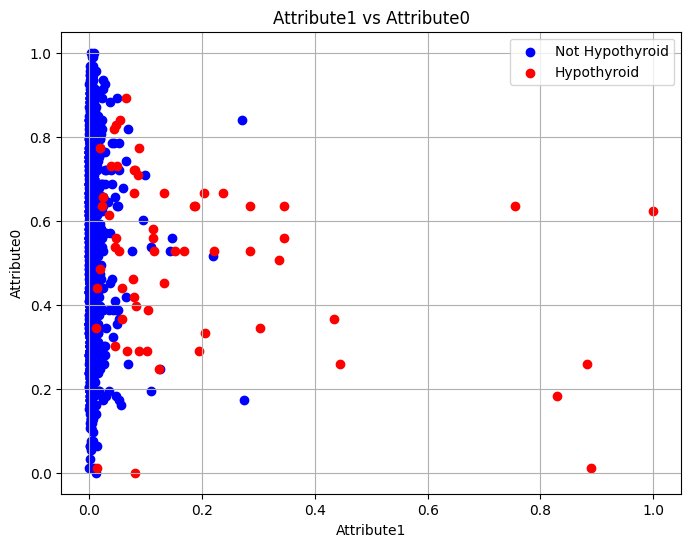

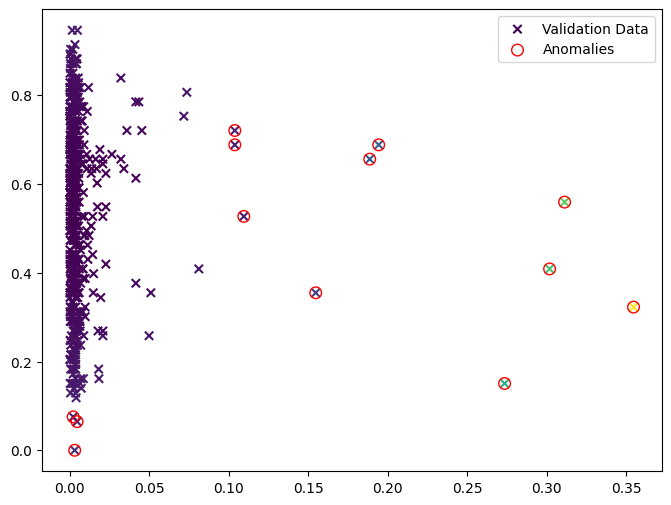

                   Features  Train_AUC  Validation_AUC  Best_threshold  \
0  Attribute1 vs Attribute0   0.872377        0.927405       -0.552738   

    Best_f1  Components  
0  0.714286           1  


In [322]:
plot_and_auc(X_train, y_train, X_val, y_val, 'Attribute1', 'Attribute0')

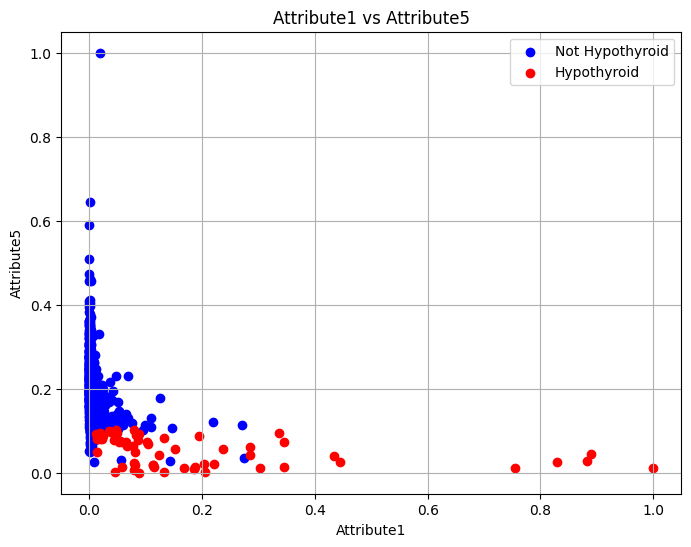

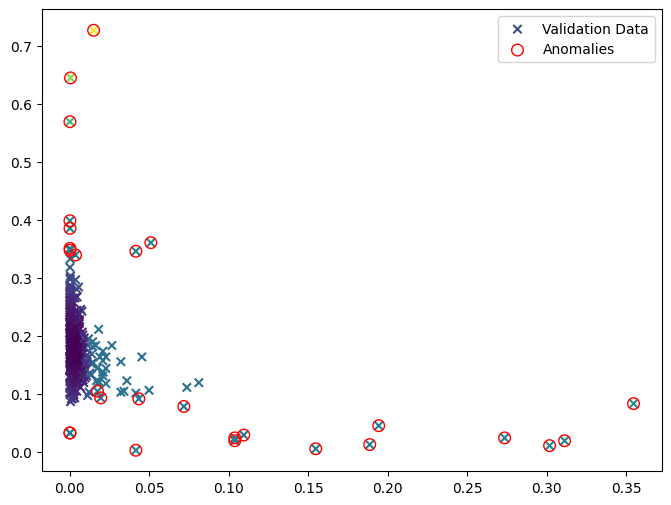

                   Features  Train_AUC  Validation_AUC  Best_threshold  \
0  Attribute1 vs Attribute5   0.985787        0.984876        0.252065   

    Best_f1  Components  
0  0.666667           2  


In [323]:
plot_and_auc(X_train, y_train, X_val, y_val, 'Attribute1', 'Attribute5')

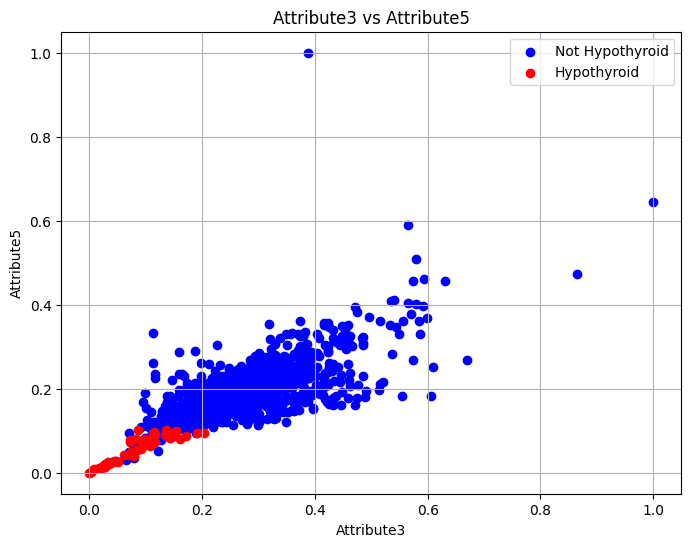

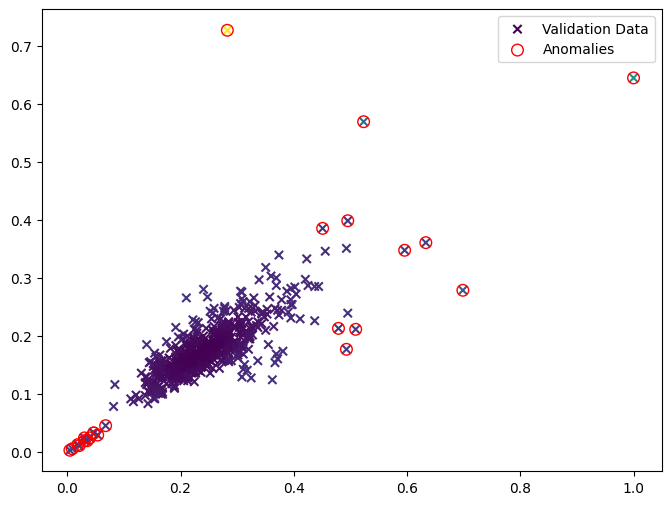

                   Features  Train_AUC  Validation_AUC  Best_threshold  \
0  Attribute3 vs Attribute5   0.934693        0.940411        0.341857   

    Best_f1  Components  
0  0.526316           2  


In [324]:
plot_and_auc(X_train, y_train, X_val, y_val, 'Attribute3', 'Attribute5')

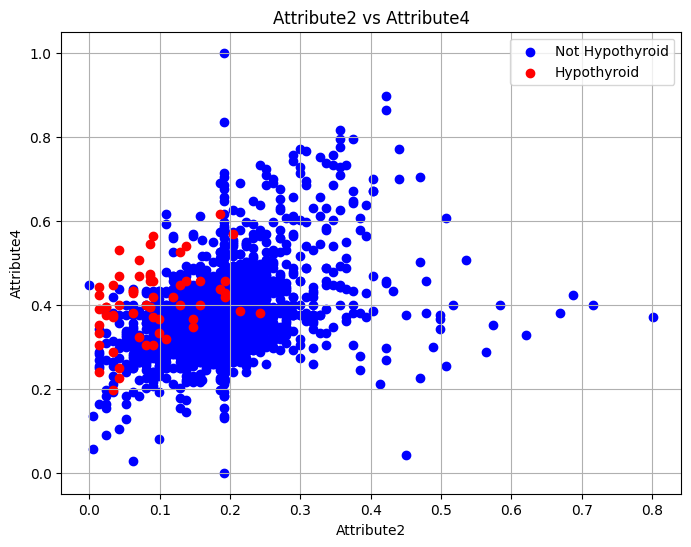

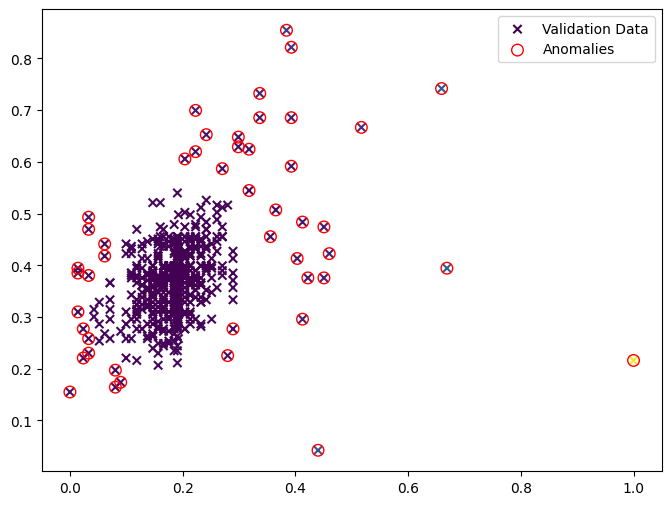

                   Features  Train_AUC  Validation_AUC  Best_threshold  \
0  Attribute2 vs Attribute4   0.814425        0.869752       -1.046247   

    Best_f1  Components  
0  0.258065           1  


In [325]:
plot_and_auc(X_train, y_train, X_val, y_val, 'Attribute2', 'Attribute4')

## **Part 4: Single feature model with two Gaussian distributions. [2 Marks]**
Now we will use two different distributions for hypothyroid and not-hypothyroid patients.
  1.  Fit a Gaussian distribution ($G_1$) on a feature of **not-hypothyroid patients** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  2. Fit another Gaussian distribution ($G_2$) on the same feature but for **hypothyroid patients** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.25]**
  3. Compute the score samples ($S$) for both $G_1$ and $G_2$ on the **validation set** to get $S_1$ and $S_2$, respectively. **[0.25]**
  4. Find an optimal $c$ (a real number) that maximizes validation set F1 Score for a model such that if $S_1 < c \times S_2$, the patient is classified as hypothyroid. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$, ($S_1$<$S_2$) then the patient is hypothyroid (the patient belongs to the $G_2$ distribution which represents hypothyroid patients). For start consider $c$ in $[0,10]$ with steps of 0.1, you can change this window in your experiments if needed. **[0.25]**
  5. Repeat the steps above for all the features. What is the best F1 Score that you get for training and validation? Which feature and what c? **[1]** <p>
  Feature: Attribute1
  Best c: 0.0
  Validation F1 Score: 0.8
  Training F1 Score: 0.7019867549668874

In [337]:
def single_feature_gmm_analysis(X_train, y_train, X_val, y_val, feature):
    # Fit GMM
    G1 = GaussianMixture(n_components=1, random_state=0)
    G2 = GaussianMixture(n_components=1, random_state=0)

    G1.fit(X_train[y_train == 0][[feature]])
    G2.fit(X_train[y_train == 1][[feature]])

    # Compute scores
    S1_val = G1.score_samples(X_val[[feature]])
    S2_val = G2.score_samples(X_val[[feature]])

    # Find the best c
    c_values = np.arange(0, 10.1, 0.1)
    best_f1_val = 0
    best_c = 0

    for c in c_values:
        y_pred_val = (S1_val < (c * S2_val))
        current_f1 = f1_score(y_val, y_pred_val)
        if current_f1 > best_f1_val:
            best_f1_val = current_f1
            best_c = c

    # Compute metrics
    S1_train = G1.score_samples(X_train[[feature]])
    S2_train = G2.score_samples(X_train[[feature]])

    y_pred_train = (S1_train < (best_c * S2_train))
    f1_train = f1_score(y_train, y_pred_train)

    # Create DF with results
    results_df = pd.DataFrame({'Feature': [feature],'Best_c': [best_c],'Training F1 Score': [f1_train],'Validation F1 Score': [best_f1_val]})
    
    return results_df


In [338]:
# Create a list to store the results for each feature
all_results = []

# Loop
for feature in features:
    result_df = single_feature_gmm_analysis(X_train, y_train, X_val, y_val, feature)
    all_results.append(result_df)

# Concatenate all the results into a single DataFrame
final_results_df = pd.concat(all_results, ignore_index=True)

# Display the final results
display(final_results_df)

# Identify the best feature and c value based on the highest Validation F1 Score
best_result = final_results_df.loc[final_results_df['Validation F1 Score'].idxmax()]
best_feature = best_result['Feature']
best_c = best_result['Best_c']
best_f1_val = best_result['Validation F1 Score']
best_f1_train = best_result['Training F1 Score']

print(f"Feature: {best_feature}")
print(f"C: {best_c}")
print(f"Validation F1 Score: {best_f1_val}")
print(f"Training F1 Score: {best_f1_train}")

,Feature,Best_c,Training F1 Score,Validation F1 Score
0,Attribute0,0.7,0.044855,0.059524
1,Attribute1,0.0,0.701987,0.800000
2,Attribute2,0.4,0.298507,0.382979
3,Attribute3,0.3,0.625767,0.705882
4,Attribute4,0.9,0.086438,0.103896
5,Attribute5,0.3,0.755556,0.800000


Feature: Attribute1
Best c: 0.0
Validation F1 Score: 0.8
Training F1 Score: 0.7019867549668874


## **Part 5: Multivariate and Mixture of Gaussians Distribution [4 Marks]**
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate).
*   To fit your model, you can take advantage of the Gaussian mixture model, where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html).
*   You can choose to fit your Gaussians on not-hypothyroid patients or to both classes.


It is up to you how to design your model. Try at least 10 different models and report the AUC for both training and validation sets (if applicable) and the best F1 score for both training and validation sets for each model. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables or plots. **[4]**<p>
The model with all features perform the best. The 5 features are [Attribute0, Attribute1, Attribute2, Attribute3, Attribute4 and Attribute5]. Its contain 3 gaussians, and the number of components for Gm on ont-hypothyroids patient is 1 and 3 for hypothyroid patients.


**HINT !**

You might want to try a two-gaussian model, multiple features, a single component for the not-hypothyroid patient, and multiple components for hypothyroid ones! Why does it make sense to have multiple components for hypothyroid patients?

In [328]:
result = []
for f_num in range(1, 7):
    for n in range(1, 6):
        # Create two Gaussian Mixture Models
        G1 = GaussianMixture(n_components=1, random_state=0)
        G2 = GaussianMixture(n_components=n, random_state=0)
        
        # Fit the models
        G1.fit(X_train.loc[y_train == 0, features[:f_num]])
        G2.fit(X_train.loc[y_train == 1, features[:f_num]])

        # Compute scores
        S1_val = G1.score_samples(X_val.loc[:, features[:f_num]])
        S2_val = G2.score_samples(X_val.loc[:, features[:f_num]])
        
        # Create two lists to store the result
        best_f1_val = 0
        best_c = 0
        
        # Define c range
        c_values = np.arange(0, 10.1, 0.1)
        
        # Loop over 'c' values to find the optimal 'c' that maximizes F1 score
        for c in c_values:
            # Make predictions based on the threshold 'c'
            y_pred_val = (S1_val < (c * S2_val))

            # Compute F1 score on validation set
            current_f1 = f1_score(y_val, y_pred_val)

            # Update best F1 score and 'c' if current F1 is better
            if current_f1 > best_f1_val:
                best_f1_val = current_f1
                best_c = c
        
        # After finding the best 'c', compute metrics on the training set
        S1_train = G1.score_samples(X_train.loc[:, features[:f_num]])
        S2_train = G2.score_samples(X_train.loc[:, features[:f_num]])
        
        # Make predictions on training set using the best 'c'
        y_pred_train = (S1_train < (best_c * S2_train))

        # Compute precision, recall, and F1 score on training set
        f1_train = f1_score(y_train, y_pred_train)
        
        # Locate the selected features
        selected_features = ', '.join(features[:f_num])
        
        # Append the results to the 'result' list
        result.append([f_num, n, best_c, f1_train, best_f1_val, selected_features])

In [329]:
# Results in a DataFrame & Rename columns
result_table = pd.DataFrame(result, columns=['Feature number', "N_Components", 'C', 'Training F1 Score','Validation F1 Score', 'Selected Features'])
# Display the result
pd.set_option('display.max_colwidth', None)
display(result_table)

,Feature number,N_Components,C,Training F1 Score,Validation F1 Score,Selected Features
0,1,1,0.7,0.044855,0.059524,Attribute0
1,1,2,6.2,0.048193,0.055046,Attribute0
2,1,3,7.5,0.048780,0.053812,Attribute0
3,1,4,3.5,0.055703,0.062500,Attribute0
4,1,5,0.6,0.047059,0.057692,Attribute0
5,2,1,0.0,0.693333,0.800000,"Attribute0, Attribute1"
6,2,2,0.0,0.693333,0.800000,"Attribute0, Attribute1"
7,2,3,0.0,0.693333,0.800000,"Attribute0, Attribute1"
8,2,4,0.0,0.693333,0.800000,"Attribute0, Attribute1"
9,2,5,0.0,0.693333,0.800000,"Attribute0, Attribute1"


In [330]:
result_table = result_table.sort_values(by=['Validation F1 Score','Training F1 Score'], ascending=False)
result_table.head(5)

,Feature number,N_Components,C,Training F1 Score,Validation F1 Score,Selected Features
27,6,3,0.6,0.816901,0.875,"Attribute0, Attribute1, Attribute2, Attribute3, Attribute4, Attribute5"
29,6,5,0.6,0.816901,0.875,"Attribute0, Attribute1, Attribute2, Attribute3, Attribute4, Attribute5"
28,6,4,0.5,0.788732,0.875,"Attribute0, Attribute1, Attribute2, Attribute3, Attribute4, Attribute5"
23,5,4,0.7,0.775510,0.875,"Attribute0, Attribute1, Attribute2, Attribute3, Attribute4"
24,5,5,0.5,0.774648,0.875,"Attribute0, Attribute1, Attribute2, Attribute3, Attribute4"


## **Part 6: Evaluating performance on test set: [1 Mark]**
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, Precision and Recall on the test set. **[1]** <p>
F1:87.5%, Recall:82.6%, Precision:93.3%


In [331]:
def evaluate_gmm_model(X_train, y_train, X_test, y_test, features, n_components=3, c_best=0.6):
    # Store the results
    result = []
    
    # Create two Gaussian Mixture Models
    G1 = GaussianMixture(n_components=1, random_state=0)
    G2 = GaussianMixture(n_components=n, random_state=0)
    
    # Fit the models
    G1.fit(X_train.loc[y_train == 0, features[:f_num]])
    G2.fit(X_train.loc[y_train == 1, features[:f_num]])

    # Compute scores
    S1 = G1.score_samples(X_test.loc[:, features[:f_num]])
    S2 = G2.score_samples(X_test.loc[:, features[:f_num]])       
    
    # F1
    F1 = f1_score(y_test, (S1 < (c_best * S2)))
    
    # Recall
    Recall = recall_score(y_test, (S1 < (c_best * S2)))
    
    # Precision
    Precision = precision_score(y_test, (S1 < (c_best * S2)))
    
    # Append the results to the 'result' list
    result.append([F1, Recall, Precision])

    # Results in a DataFrame & Rename columns
    evalute_table = pd.DataFrame(result, columns=['F1 Score', 'Recall', 'Precision'])
    
    # Display the result
    display(evalute_table)

      

In [332]:
evaluate_gmm_model(X_train, y_train, X_test, y_test, features, n_components=3, c_best=0.6)

,F1 Score,Recall,Precision
0,0.875,0.823529,0.933333


## **Part 7: Is Gaussian the only useful distribution? [1 Mark]**

Search for other distributions that could be used to model the data. How popular are they? Is there a specific situation where a distribution works better? How can we find a suitable distribution to model our data? Do not forget to include your references.<p>
Possion distribution looks at the period of time for a fixed number of events(Anomaly detection with the Poisson distribution).A natural approach to anomaly detection is to examine the number of events within a fixed time period. Once the aggregation process is complete, the total event count for that period is revealed. By comparing this count to our model or prediction, we can determine whether the value is anomalous. A another usesful distribution is Exponentially-distribution.With a few basic assumptions, an effective model and formula can be applied to interarrival times to flag those that are considered "too long," based on predefined criteria(Raybon, 2019). While this method is not a guaranteed way to detect actual anomalies, it serves as a means of identifying events that are statistically unlikely to occur by chance.To determine a suitable distribution, techniques like Goodness-of-Fit tests (e.g., Kolmogorov-Smirnov, Chi-Square) and visual assessments (e.g., Q-Q plots, histograms) can be employed to compare how well different distributions align with the observed data patterns(Frost, 2023).


Citation:<p>
Anomaly detection with the Poisson distribution. Anomaly. (2018, December 7). https://anomaly.io/anomaly-detection-poisson-distribution/index.html<p>
Frost, J. (2023, October 16). How to identify the distribution of your data. Statistics By Jim. https://statisticsbyjim.com/hypothesis-testing/identify-distribution-data/<p>
Raybon, S. (2019, July 23). Real-time anomaly detection with exponentially-distrubted data. Medium. https://towardsdatascience.com/real-time-anomaly-detection-with-exponentially-distrubted-data-205e0df32096 